# TP Arbres de décision, forêts aléatoires et boosting

## Consignes

Ce notebook constitue la base des programmes et du compte-rendu. Y rajouter directement:
* blocs de programme
* affichage d'images résultats
* réponses aux questions et éléments d'analyse

*Envoyer le fichier ipynb avant le 20 février à : bertrand.le_saux@onera.fr*

*Mentionner dans le sujet du mail et le nom de fichier les noms des étudiants.*

## Contenu

Ce TP porte sur l'analyse de statistiques extraites de la série de livres _Game of Thrones_. 
Plus précisément, l'objectif est de prédire la survie ou la disparition des personnages
en se basant sur les données mises à disposition.

Les données proviennent du fan site:
https://got.show/machine-learning-algorithm-predicts-death-game-of-thrones
    
Ici vous pouvez accéder au fichier de données GoT légèrement modifié pour ce TD : [character-predictions-new.csv](character-predictions-new.csv)


Les différentes étapes consistent à:
* Analyser les données;
* Prédire la survie ou disparition des personnages par:
    * Arbres de décision;
    * Forêt aléatoire;
    * Boosting.

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
character_predictions = pd.read_csv('character-predictions-new.csv')
df = character_predictions

# Analyse des données

* Que contient le fichier fourni ?
* Quel type de données est disponible ?
* Analyser statistiquement ces données.

In [15]:
# Exemple de fonction affichant un histogramme de survie
def plot(cat):
    df.groupby(cat).isAlive.mean().plot(kind='bar')
    plt.ylabel('Percent Alive')
    plt.ylim([0.0, 1.0])
    plt.show()

In [16]:
df.keys()

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'DateoFdeath',
       'mother', 'father', 'heir', 'house', 'spouse', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isAliveMother', 'isAliveFather',
       'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age',
       'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity',
       'isAlive', 'num_books', 'name_in_house'],
      dtype='object')

In [17]:
df

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,num_books,name_in_house
0,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,0,0,NaN,11,1,1,0.605351,0,0,0
1,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,1,1,97.0,1,1,1,0.896321,1,5,1
2,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,...,0,1,NaN,0,0,0,0.267559,1,1,0
3,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,...,1,1,23.0,0,0,0,0.183946,0,0,1
4,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,...,1,1,29.0,0,0,0,0.043478,1,1,1
5,Tommen Baratheon,NaN,1,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,...,0,0,NaN,5,1,1,1.000000,1,0,0
6,Valarr Targaryen,Hand of the King,1,Valyrian,183.0,209.0,NaN,NaN,NaN,House Targaryen,...,1,1,26.0,0,0,1,0.431438,0,0,1
7,Viserys I Targaryen,NaN,1,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,...,0,0,NaN,5,1,1,0.678930,0,0,0
8,Wilbert,Ser,1,NaN,NaN,298.0,NaN,NaN,NaN,NaN,...,0,1,NaN,0,0,0,0.006689,0,1,0
9,Wilbert Osgrey,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Osgrey,...,0,1,NaN,0,0,0,0.020067,1,0,1


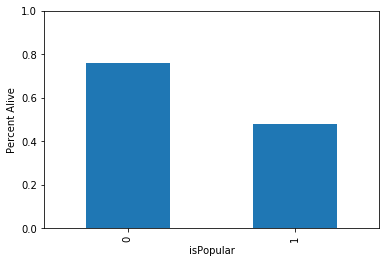

In [18]:
plot('isPopular')

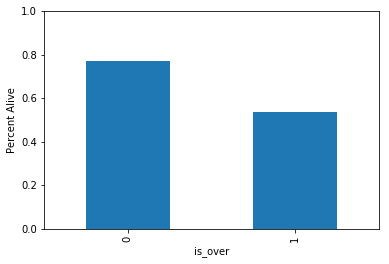

In [19]:
df['is_over'] = df['age'].apply(lambda x: 1 if x>30 else 0)
plot('is_over')
df.drop('is_over',axis=1,inplace=True)

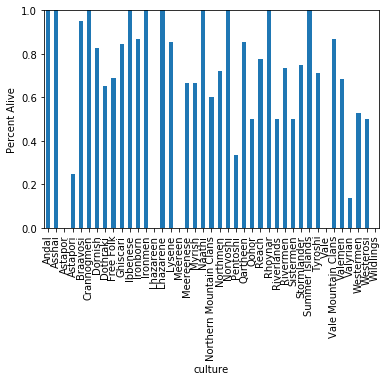

In [20]:
plot("culture")

# Prédiction par arbre de décision

* Entraîner un arbre de décision sur les données
* Prédire la survie des personnages sur un ensemble de test (aléatoire ou 'book5' par exemple)
* Mesurer l'influence des paramètres de l'algorithme
* Évaluer la qualité de la prédiction
* Expliquer votre démarche

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [22]:
## 'age' column has NaN values which are not ok for sklearn
from sklearn.preprocessing import Imputer

## replace NaN by average age
imp=Imputer(missing_values="NaN", strategy="mean" )
df["age"]=imp.fit_transform(df[["age"]]).ravel()

print(df['age'].mean() )

#df

36.646651270208054


In [23]:
# prepare training set and corresponding labels
feature_cols = ['male','book1','book2','book3','book4','book5','isMarried','isNoble','popularity','name_in_house',\
                'boolDeadRelations','age','numDeadRelations']
X = df[feature_cols]
y = df.isAlive

indices = np.arange( len(y) )

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, indices, random_state=0)

In [24]:
from sklearn.tree import DecisionTreeClassifier

# train a decision tree
# default parameters (Gini coefficient)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

# test the classifier
y_pred=clf.predict(X_test)

# compute classification accuracy
print (clf.score(X_test, y_test) )

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print(clf.classes_)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

0.724845995893
[0 1]
[[ 68  59]
 [ 75 285]]
             precision    recall  f1-score   support

          0       0.48      0.54      0.50       127
          1       0.83      0.79      0.81       360

avg / total       0.74      0.72      0.73       487



In [25]:
def next_popular_dead(df, y_pred, y_test):
    # print names of the predicted dead
    # find how to get indices and then the names
    badguys=df['name'].values
    pop = df['isPopular'].values

    true_dead = np.where( ((y_pred==0) & (y_pred==y_test)) )[0]
    false_dead = np.where( ((y_pred==0) & (y_pred!=y_test)) )[0]

    #print(badguys[idx_test[true_dead]])
    #print(badguys[idx_test[false_dead]])

    # potential popular dead in season 6 and 7... SPOILER !
    false_dead_badguys = badguys[idx_test[false_dead]]
    return(false_dead_badguys[pop[idx_test[false_dead]]==1])

print('next popular dead: ')
print(next_popular_dead(df, y_pred, y_test))

next popular dead: 
['Cersei Lannister' 'Loras Tyrell' 'Orton Merryweather' 'Illyrio Mopatis'
 'Barristan Selmy' 'Tommen Baratheon' 'Walder Frey' 'Jon Connington'
 'Jaime Lannister' 'Gendry' 'Jeyne Poole' 'Euron Greyjoy']


In [26]:
# train a decision tree
# fine-tuned coefficients: entropy as loss, deep tree, well-balanced split
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=12, min_samples_split=0.35)
clf.fit(X_train,y_train)

# test the classifier
y_pred=clf.predict(X_test)

# compute classification accuracy
print (clf.score(X_test, y_test) )

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print(clf.classes_)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

print('next popular dead: ')
print(next_popular_dead(df, y_pred, y_test))

0.796714579055
[0 1]
[[ 48  79]
 [ 20 340]]
             precision    recall  f1-score   support

          0       0.71      0.38      0.49       127
          1       0.81      0.94      0.87       360

avg / total       0.78      0.80      0.77       487

next popular dead: 
['Tommen Baratheon' 'Euron Greyjoy']


# Prédiction par forêt aléatoire

* Entraîner une _random forest_ sur les données
* Prédire la survie des personnages sur un ensemble de test (aléatoire ou 'book5' par exemple)
* Expliquer et mesurer l'influence des paramètres de l'algorithme
* Évaluer la qualité de la prédiction
* Expliquer votre démarche

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [28]:
rf = RandomForestClassifier(max_depth=3, random_state=0)
rf.fit(X_train, y_train)

# All possible parameters:
#RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#            max_depth=2, max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
#            oob_score=False, random_state=0, verbose=0, warm_start=False)

# sort features by importance and print them
idx_imp = np.argsort(rf.feature_importances_, axis=None) 
#print( rf.feature_importances_[idx_imp[::-1]] )
#print(idx_imp[::-1])

for i in idx_imp[::-1]: print( feature_cols[ i ] )


book4
popularity
boolDeadRelations
numDeadRelations
age
book1
male
book3
book2
isMarried
book5
isNoble
name_in_house


In [29]:
# test the classifier
y_pred=rf.predict(X_test)

# compute classification accuracy
print (rf.score(X_test, y_test) )

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print(rf.classes_)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

print('next popular dead: ')
print(next_popular_dead(df, y_pred, y_test))

0.76180698152
[0 1]
[[ 13 114]
 [  2 358]]
             precision    recall  f1-score   support

          0       0.87      0.10      0.18       127
          1       0.76      0.99      0.86       360

avg / total       0.79      0.76      0.68       487

next popular dead: 
['Tommen Baratheon' 'Euron Greyjoy']


In [30]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       n_estimators=130, oob_score=True, max_depth=12, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [31]:
# test the classifier
y_pred=rf.predict(X_test)

# compute classification accuracy
print (rf.score(X_test, y_test) )

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print(rf.classes_)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

print('next popular dead: ')
print(next_popular_dead(df, y_pred, y_test))

0.82135523614
[0 1]
[[ 57  70]
 [ 17 343]]
             precision    recall  f1-score   support

          0       0.77      0.45      0.57       127
          1       0.83      0.95      0.89       360

avg / total       0.81      0.82      0.80       487

next popular dead: 
['Barristan Selmy' 'Tommen Baratheon' 'Gendry' 'Jeyne Poole'
 'Euron Greyjoy' 'Harys Swyft']


# Prédiction par Boosting

* Entraîner un algorithme de boosting sur les données
* Prédire la survie des personnages sur un ensemble de test (aléatoire ou 'book5' par exemple)
* Expliquer et mesurer l'influence des paramètres de l'algorithme
* Évaluer la qualité de la prédiction
* Expliquer votre démarche

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
adaboo = AdaBoostClassifier(random_state=0, algorithm='SAMME')
# all parameters (not so much!)
#AdaBoostClassifier(base_estimator=None, n_estimators=50, 
#learning_rate=1.0, algorithm=’SAMME.R’,random_state=None)

adaboo.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=50, random_state=0)

In [34]:
# test the classifier
y_pred=adaboo.predict(X_test)

# compute classification accuracy
print (adaboo.score(X_test, y_test) )

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print(adaboo.classes_)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

print('next popular dead: ')
print(next_popular_dead(df, y_pred, y_test))

0.802874743326
[0 1]
[[ 51  76]
 [ 20 340]]
             precision    recall  f1-score   support

          0       0.72      0.40      0.52       127
          1       0.82      0.94      0.88       360

avg / total       0.79      0.80      0.78       487

next popular dead: 
['Tommen Baratheon' 'Euron Greyjoy']


In [35]:
graboo = GradientBoostingClassifier(random_state=0, max_depth=5, subsample=0.5, )
# all parameters
#GradientBoostingClassifier(loss=’deviance’, learning_rate=0.1, n_estimators=100, 
#subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
#min_impurity_split=None, init=None, random_state=None, max_features=None, 
#verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’)

graboo.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=0.5, verbose=0,
              warm_start=False)

In [36]:
# test the classifier
y_pred=graboo.predict(X_test)

# compute classification accuracy
print (graboo.score(X_test, y_test) )

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print(graboo.classes_)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

print('next popular dead: ')
print(next_popular_dead(df, y_pred, y_test))

0.813141683778
[0 1]
[[ 58  69]
 [ 22 338]]
             precision    recall  f1-score   support

          0       0.72      0.46      0.56       127
          1       0.83      0.94      0.88       360

avg / total       0.80      0.81      0.80       487

next popular dead: 
['Loras Tyrell' 'Jon Snow' 'Barristan Selmy' 'Tommen Baratheon'
 'Walder Frey' 'Jaime Lannister' 'Gendry' 'Jeyne Poole' 'Euron Greyjoy']
